## AdaBoost for Classification

In [12]:
!pip install scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
# Reporting the requi red Libraries
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv("heart_v2.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


Shape: (270, 5)


,count,proportion
heart disease,,
0,150,0.555556
1,120,0.444444


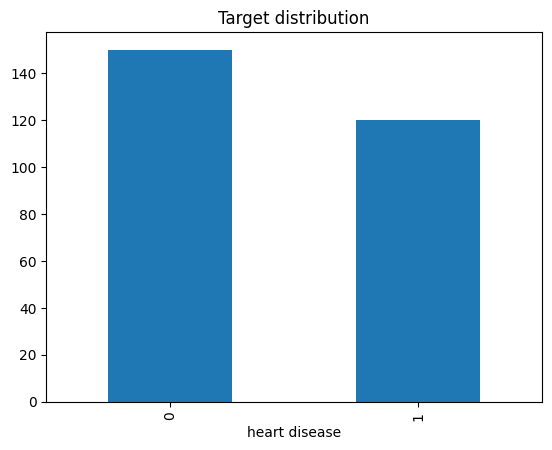

In [16]:
# import the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "heart disease"

print("Shape:", df.shape)

counts = df[target_col].value_counts()
proportions = df[target_col].value_counts(normalize=True)

display(pd.DataFrame({"count": counts, "proportion": proportions}))

counts.plot(kind="bar", title="Target distribution")
plt.show()

In [18]:
#3.	Putting Feature VariabLe to  X and Target  variab Le to y.
# Putting feature var!abL e to X
X = df.drop('heart disease',axis=1)
y = df['heart disease']

In [23]:
#4.	Train- Test-SpL it  is  penforned
# now Lets spL it  the data into train and test
from sklearn.model_selection import train_test_split
# SpL i tting the data tnto train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (189, 4) Test: (81, 4)


In [24]:
#5 Train the model
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from numpy import mean, std

# Define the model
model = AdaBoostClassifier(random_state=1)

# Evaluate the model using cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(
    model,
    X,
    y,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    error_score='raise'
)

# Report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# Example output: Accuracy: 0.621 (0.095)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Example output: Accuracy: 64.20%


Accuracy: 0.654 (0.096)
Accuracy: 64.20%


## AdaBoost for Regression

In [25]:
# AdaBoost for Regression

from numpy import mean, std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

# Evaluate AdaBoost ensemble for regression

# Define dataset
X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    noise=0.1,
    random_state=1
)

# Define the model
model = AdaBoostRegressor(random_state=1)

# Evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(
    model,
    X,
    y,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=-1,
    error_score='raise'
)

# Report performance (convert to positive MAE)
mae_scores = -n_scores
print('MAE: %.3f (%.3f)' % (mean(mae_scores), std(mae_scores)))


MAE: 95.845 (9.081)
